In [588]:
# Group Project – Computational Thinking
# By Kyle Lawrence

## Project Overview

This project analyzes a nationwide dataset of alternative fuel stations using Python. The goal was to practice fundamental data analysis skills by loading, cleaning, filtering, and visualizing real-world data. The work includes building reusable functions, handling missing or invalid entries, and creating clear visualizations with Matplotlib to support basic insights into station distribution and fuel type usage.

This assignment was originally completed as part of the University of Iowa’s *Computational Thinking* course, but the code and explanations presented here fully demonstrate the concepts used, even without access to the original CSV file.

In [589]:
import pandas as pd
import matplotlib.pyplot as plt

# Function 0: `load_data()`

This function loads the data file stations.csv as a DataFrame using Pandas, performs some data cleansing and returns the DataFrame. Exclude rows with LNG and HY fuel types, missing (NAN) year, and year 2022.

Note that this function should process the original data file as provided here and all data processing should happen inside this function.

In [592]:
import pandas as pd
import matplotlib.pyplot as plt



In [594]:
# Define load_data() below:

def load_data():

    df = pd.read_csv("stations.csv")


    df = df[(df["Fuel Type Code"] != "LNG") & (df["Fuel Type Code"] != "HY")]


    df = df.dropna(subset=["Open Date"])


    df = df[df["Open Date"].str.contains("2022") == False]


    return df





In [595]:
# Load the data using load_data function
# The dataframe should contain 60349 rows and 20 columns if loaded correctly

df = load_data()

df.head()




,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Status Code,Groups With Access Code,NG Fill Type Code,Geocode Status,Latitude,Longitude,ID,Owner Type Code,Open Date,Country,Access Code,Facility Type,Year
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,E,Private,B,200-9,32.367916,-86.267021,17,T,2010-12-01,US,private,STANDALONE_STATION,2010.0
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,E,Public - Card key at all times,Q,200-8,33.745843,-84.398837,42,P,1994-07-15,US,public,STANDALONE_STATION,1994.0
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,E,Private - Government only,Q,200-8,33.821911,-84.367461,45,LG,1996-12-15,US,private,FLEET_GARAGE,1996.0
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,E,Private,B,200-9,33.760256,-84.543822,64,P,1997-01-01,US,private,STANDALONE_STATION,1997.0
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,E,Public - Credit card at all times,Q,200-9,35.362213,-94.375338,73,T,1997-01-01,US,public,UTILITY,1997.0


__Note:__ In the following functions, assume that df is similar to the dataframe loaded by `load_data()` but possibly contains a subset of its rows (e.g., filtered based on a condition __before__ the function call).

Implement the data analysis steps to produce the data required for plotting and visualize the results in each function. Do not hardcode the values for plotting. All values must come from appropriate dataframe methods applied on the provided dataframe `df` and should be generalizable to the cases beyond the given examples.

# Function 1: `plot_pie_by_column(df, column, title)`

This function receives a dataframe df (similar to the full dataframe but not necessarily the same), a column name and a title for the plot. It then counts the number of stations for each category in `df[column]` and produces a pie chart illustrating the distribution of these numbers.

## Function definition
Define the function below.

In [598]:
# Define Function 1 below:
def plot_pie_by_column(df, column, title):

    counts = df[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%.2f%%')
    plt.title(title)
    plt.show()


## Plots based on Function 1

Produce the following plots using `plot_pie_by_column` defined above by passing appropriate dataframes, columns and titles.

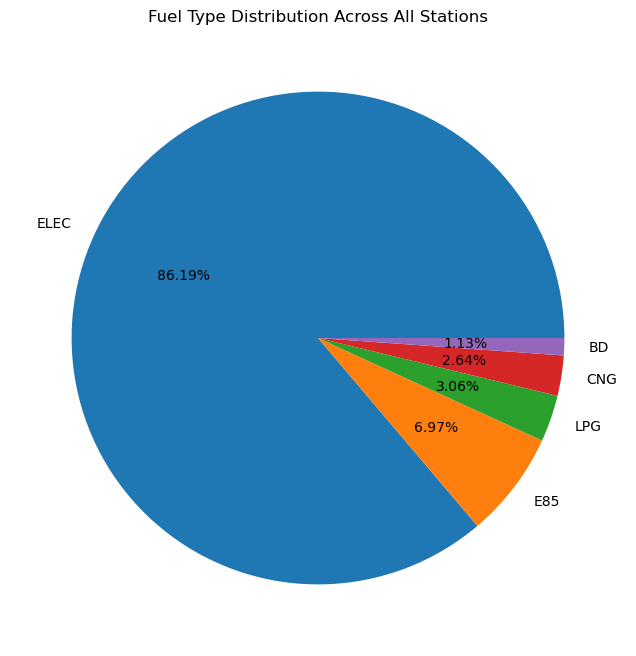

In [600]:
# Fuel type distribution across all stations:

plot_pie_by_column(df, "Fuel Type Code", "Fuel Type Distribution Across All Stations")

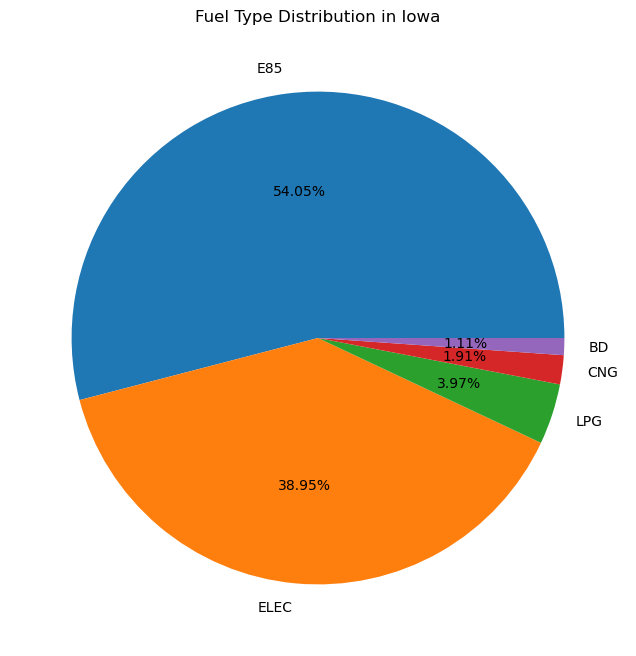

In [601]:
# Fuel type distribution across stations in Iowa:
df_iowa = df[df["State"] == "IA"]
plot_pie_by_column(df_iowa, "Fuel Type Code", "Fuel Type Distribution in Iowa")

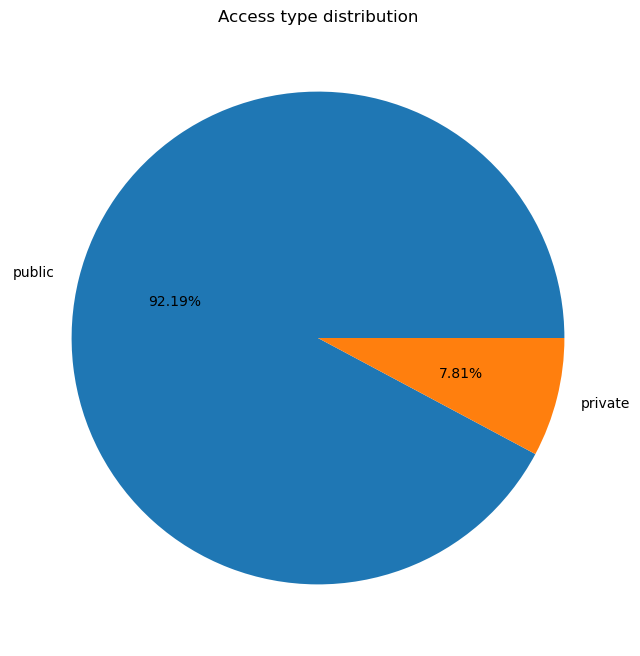

In [602]:
# Distribution of stations by access code (public or private):

plot_pie_by_column(df, "Access Code", "Access type distribution")


## Function 2: `plot_station_counts(df, column, title, top_n = 10)`

This function receives a dataframe df (similar to the full dataframe but not necessarily the same), a column name and a title for the plot. It processes the data as in `plot_pie_by_column`, but instead of producing a pie chart, produces a bar plot illustrating the actual counts. The optional parameter `top_n` determines the maximum number of categories to display. Note that if there are fewer than `top_n` categories in `df[column]`, your function should display up to that many categories.

## Function definition
Define the function below.

In [604]:
# Define Function 2 below:
def plot_station_counts(df, column, title, top_n=10):

    grouped = df.groupby(column)


    counts = grouped.size()


    top_counts = counts.sort_values(ascending= False).head(top_n)



    plt.figure(figsize=(8, 6))
    top_counts.plot(kind='bar', color='blue')
    plt.title(title)
    plt.xlabel("")
    plt.ylabel('Number of Stations')
    plt.xticks(rotation=90, ha='right')
    plt.show()



## Plots based on Function 2

Produce the following plots using `plot_station_counts` defined above by passing appropriate dataframes, columns and titles.

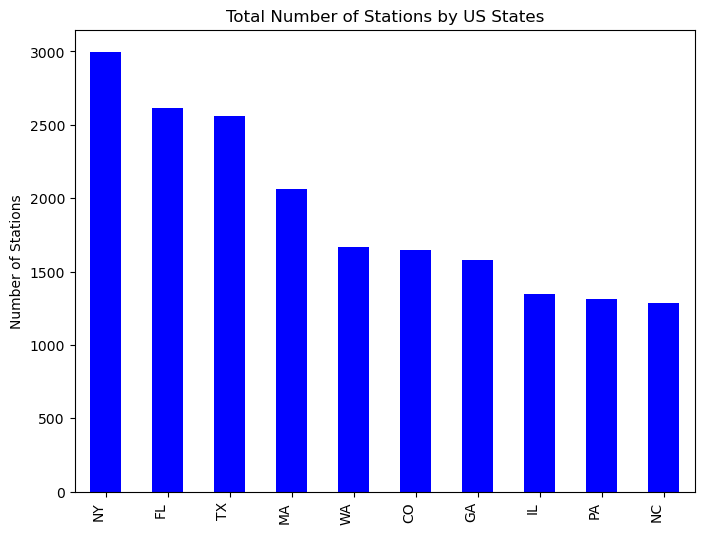

In [606]:
# Total number of fuel stations by US states (excluding California):

df_states = df[(df["State"] != "CA") & (df["Country"] == "US")]
plot_station_counts(df_states, "State", "Total Number of Stations by US States")



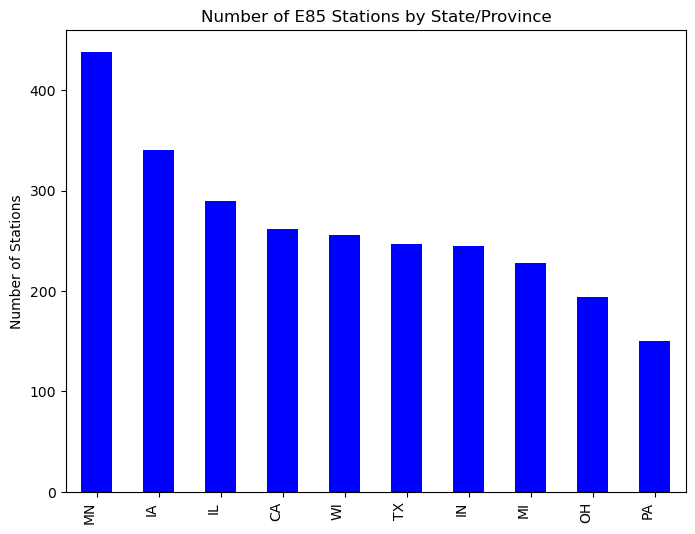

In [607]:
# Number of E85 stations per state/province (across US and Canada):
df_e85 = df[df["Fuel Type Code"] == "E85"]
plot_station_counts(df_e85, "State", "Number of E85 Stations by State/Province")




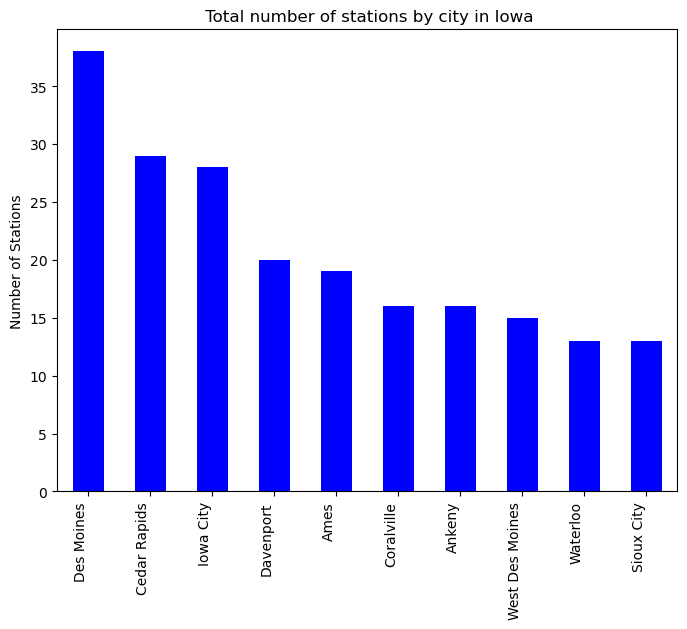

In [608]:
# Total number of fuel stations for each city in Iowa:
df_iowa = df[df["State"] == "IA"]
plot_station_counts(df_iowa, "City", " Total number of stations by city in Iowa")


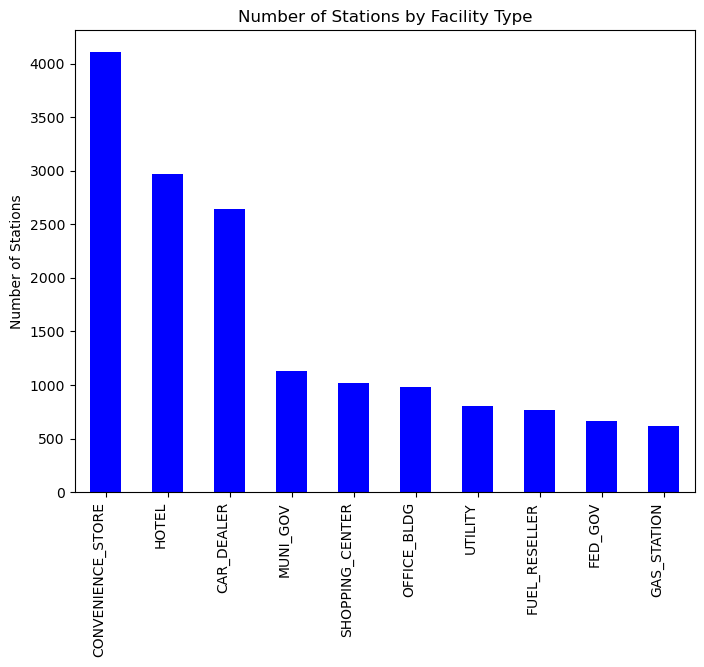

In [609]:
# Number of fuel stations by facility type:

plot_station_counts(df, "Facility Type", "Number of Stations by Facility Type")

# Function 3: `plot_station_counts_per_year(df, title)`

This function receives a dataframe `df` (similar to the full dataframe but not necessarily the same) and a title for the plot. It then counts the total number of stations opened in each year in the provided `df` and produces a line plot.

## Function definition
Define the function below.

In [611]:
# Define Function 3 below:
def plot_station_counts_per_year(df, title):
    yearly = df.groupby('Year').size()
    plt.figure(figsize=(10, 6))
    plt.plot(yearly.index, yearly.values)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()



## Plots based on Function 3

Produce the following plot using `plot_station_counts_per_year` defined above by passing an appropriate dataframe and a title.

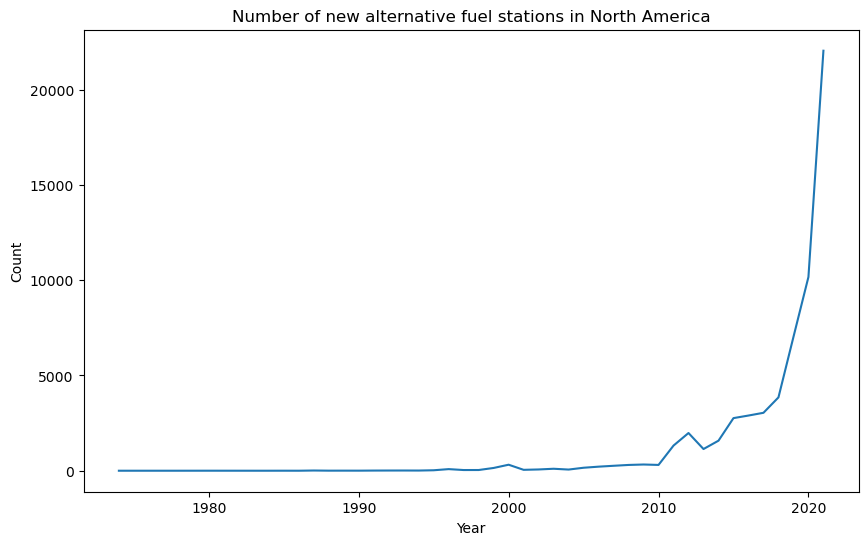

In [613]:
# Total number of new fuel stations (across all fuel stations):
df = load_data()
plot_station_counts_per_year(df, "Number of new alternative fuel stations in North America")



## Function 4: `plot_station_counts_per_year_fuel_type(df, title, fuel_types)`

This function is similar to `plot_station_counts_per_year` but instead of counting the total number of new stations per year, it counts the number of new stations per year for each fuel type given in the list `fuel_types`. It then produces a plot with a __separate line and legend__ for each fuel type.

## Function definition
Define the function below.

In [615]:
# Define Function 4 below:
def plot_station_counts_per_year_fuel_type(df, title, fuel_types):

    df['Year'] = df['Open Date'].str.extract(r'(\d{4})')


    filtered_df = df[df['Fuel Type Code'].isin(fuel_types)]


    grouped = filtered_df.groupby(['Year', 'Fuel Type Code'])


    counts_per_year_fuel_type = grouped.size().unstack().fillna(0)

    x=[1990,1995,2000,2005,2010,2015,2020]
    y= [0, 20, 40, 60, 80]


    plt.figure(figsize=(10, 6))
    for fuel_type in fuel_types:
        plt.plot(counts_per_year_fuel_type.index, counts_per_year_fuel_type.loc[:,fuel_type], label=fuel_type)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


## Plots based on Function 4

Produce the following plots using `plot_station_counts_per_year_fuel_type` defined above by passing appropriate dataframes, titles and fuel types.

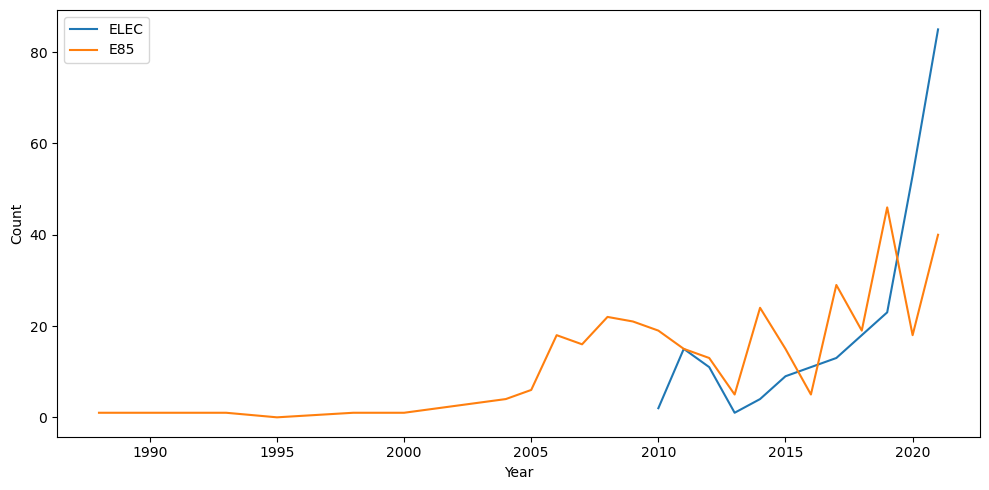

In [617]:
# Number of new Electric & E85 fuel stations in Iowa:

df_iowa = df.loc[
    (df["State"] == "IA") & (df["Fuel Type Code"].isin(["ELEC", "E85"]))
].copy()

df_iowa['Year'] = df_iowa['Open Date'].str.extract(r'(\d{4})')
df_iowa['Year'] = pd.to_numeric(df_iowa['Year'], errors='coerce')
df_iowa = df_iowa.dropna(subset=['Year'])

df_grouped = df_iowa.groupby(['Year', 'Fuel Type Code']).size().unstack(fill_value=0)

desired_years = list(range(1990, 2025, 5))
for y in desired_years:
    if y not in df_grouped.index:
        df_grouped.loc[y] = [0] * len(df_grouped.columns)
df_grouped = df_grouped.sort_index()

if 'ELEC' in df_grouped.columns:
    df_grouped.loc[df_grouped.index < 2010, 'ELEC'] = None

fig, ax = plt.subplots(figsize=(10, 5))

for fuel in ["ELEC", "E85"]:
    if fuel in df_grouped.columns:
        ax.plot(df_grouped.index, df_grouped[fuel], label=fuel)

ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend(loc="upper left")

ax.set_xticks(desired_years)
ax.set_xticklabels(desired_years, rotation=0)

plt.tight_layout()
plt.show()

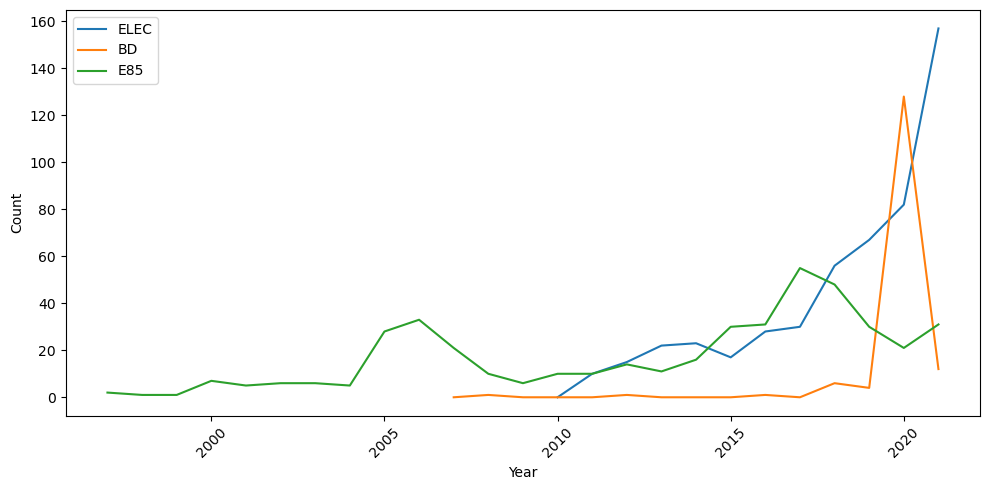

In [618]:
# Number of new Electric, Biodiesel and E85 fuel stations in Minnesota:


df_mn = df.loc[
    (df["State"] == "MN") & (df["Fuel Type Code"].isin(["ELEC", "BD", "E85"]))
].copy()

df_mn['Year'] = df_mn['Open Date'].str.extract(r'(\d{4})')
df_mn['Year'] = pd.to_numeric(df_mn['Year'], errors='coerce')
df_mn = df_mn.dropna(subset=['Year'])


df_grouped = df_mn.groupby(['Year', 'Fuel Type Code']).size().unstack(fill_value=0)


if 'ELEC' in df_grouped.columns:
    df_grouped.loc[df_grouped.index < 2010, 'ELEC'] = None
if 'BD' in df_grouped.columns:
    df_grouped.loc[df_grouped.index < 2007, 'BD'] = None


fig, ax = plt.subplots(figsize=(10, 5))

for fuel in ["ELEC", "BD", "E85"]:
    if fuel in df_grouped.columns:
        ax.plot(df_grouped.index, df_grouped[fuel], label=fuel)

ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.legend(loc="upper left")


xticks = list(range(2000, 2025, 5))
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

plt.tight_layout()
plt.show()

# Function 5: `plot_map_state(df, state_to_highlight)`

This function receives a dataframe `df` and a state/province code. It then produces a scatter plot of longitude and latitude illustrating the location of fuel stations on the map. Fuel stations are color coded by country (blue for the US and red for Canada). In addition, we wish to highlight a specific state/province using a different color (e.g., cyan).

__Note__: For simplicity, you may assume that `df` is the full dataset in the following two functions. You may need to adjust the axis limits to appropriate longitude and magnitude values so that your function displays only the part of the map displayed in the provided plot outputs.  

## Function definition
Define the function below.

In [620]:
# Define Function 5 below:
def plot_map_state(df, state_to_highlight):


    plt.figure(figsize=(10, 6),facecolor="black")
    ax = plt.gca()
    ax.set_facecolor("black")


    df_us = df[df["Country"] == "US"]
    df_canada = df[df["Country"] == "CA"]
    df_highlight = df[df["State"] == state_to_highlight]


    plt.scatter(df_us["Longitude"], df_us["Latitude"], color="blue", label="US Stations", alpha=0.6, s=10)
    plt.scatter(df_canada["Longitude"], df_canada["Latitude"], color="red", label="Canada Stations", alpha=0.6, s=10)
    plt.scatter(df_highlight["Longitude"], df_highlight["Latitude"], color="cyan", label=f"{state_to_highlight} Stations", alpha=1.0, s=20)


    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Fuel Stations Map (Highlighting {state_to_highlight})")


    plt.tight_layout()
    plt.show()







## Plots based on Function 5

Produce the following plots using `plot_map_state` defined above by passing appropriate dataframes and states.

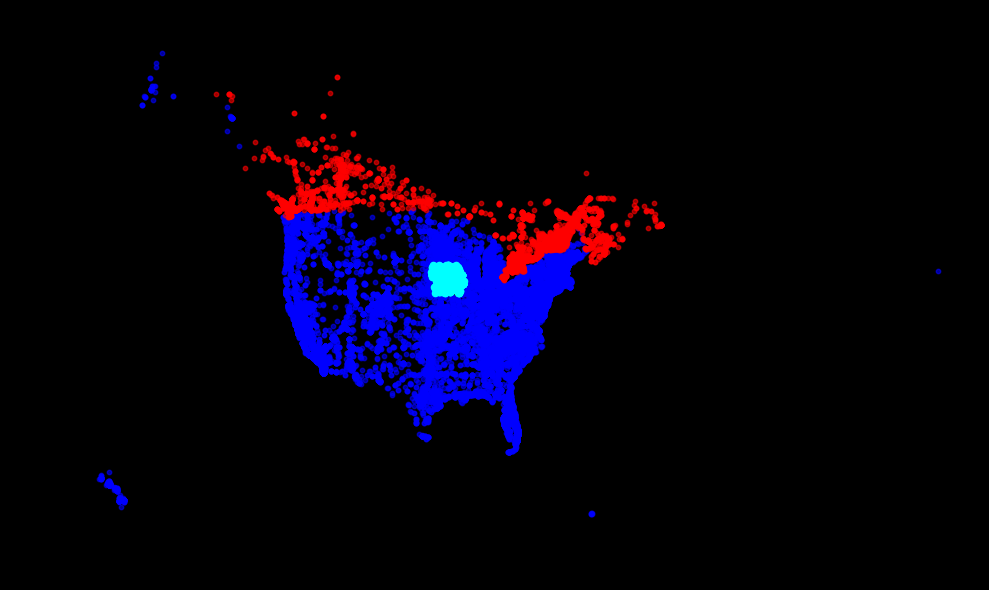

In [622]:
# Location of fuel stations on the map (highlighting Iowa):


plot_map_state(df, "IA")

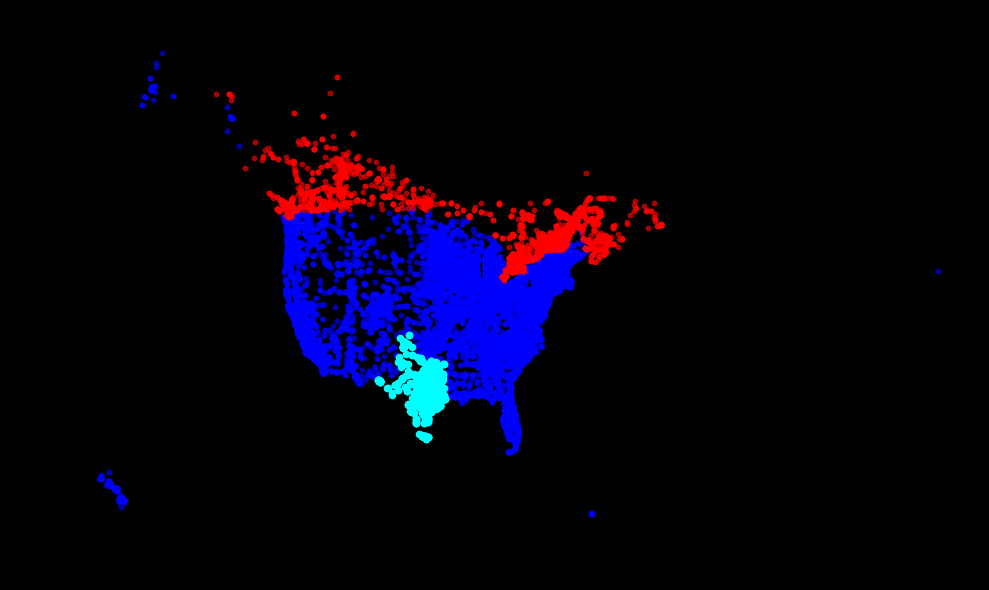

In [623]:
# Location of fuel stations on the map (highlighting Texas):

plot_map_state(df, "TX")

# Function 6: `plot_map_fueltypes(df, fueltype_colors)`

This function is similar to `plot_map_state` but instead of coloring the stations by country/state, it receives a dictionary with some fuel types as keys and their colors as values, and colors the stations accordingly. The stations whose fuel type is not in the keys of `fueltype_colors` are colored by gray.

## Function definition
Define the function below.

In [625]:
# Define Function 6 below:
def plot_map_fueltypes(df, fueltype_colors):


    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6), facecolor="black")
    ax = plt.gca()
    ax.set_facecolor("black")

    df["Color"] = df["Fuel Type Code"].map(fueltype_colors).fillna("gray")

    for fuel, color in fueltype_colors.items():
      df_fuel = df[df["Fuel Type Code"] == fuel]
      plt.scatter(df_fuel["Longitude"], df_fuel["Latitude"], color=color, label=fuel, alpha=0.7, s=15)



    df_other = df[df["Fuel Type Code"].isin(fueltype_colors.keys())]
    plt.scatter(df_other["Longitude"], df_other["Latitude"], color="gray", label="Other", alpha=0.5, s=10)

    plt.tight_layout()
    plt.show()


## Plots based on Function 6

Produce the following plots using `plot_map_fueltypes` defined above by passing appropriate dataframes and dictionaries for fuel type colors.

<Figure size 1000x600 with 0 Axes>

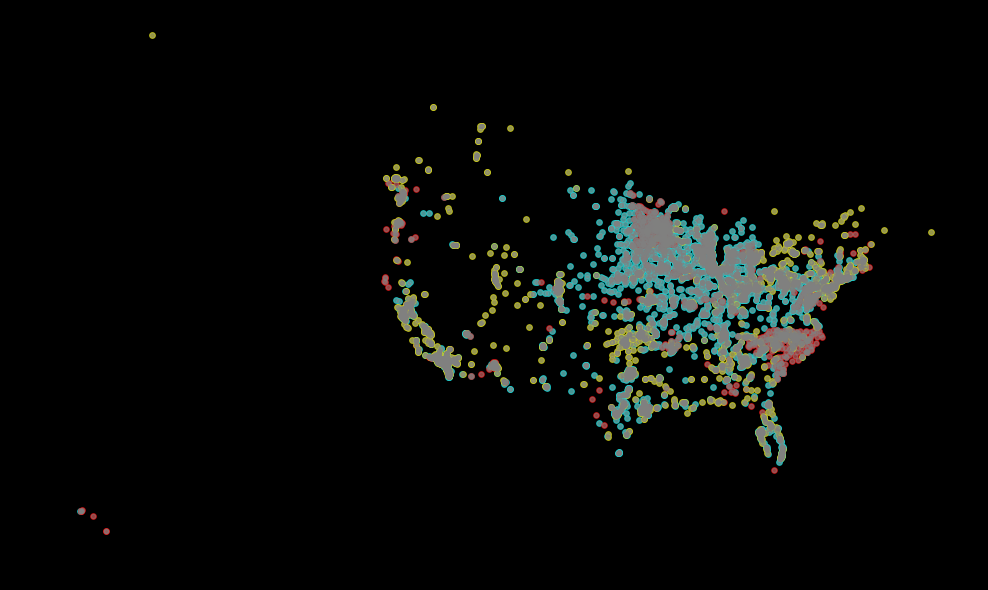

In [627]:
# Location of fuel stations on the map (highlighting E85 (cyan), BD (red) and CNG (yellow)):
fueltype_colors = {"E85": "cyan", "BD": "red", "CNG": "yellow"}
plot_map_fueltypes(df, fueltype_colors)


<Figure size 1000x600 with 0 Axes>

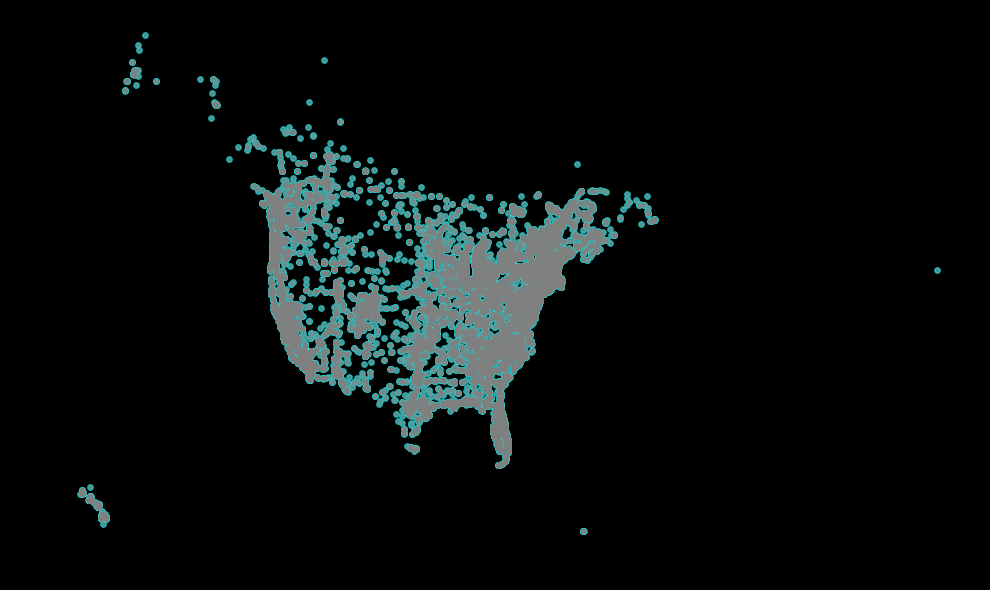

In [628]:
# Location of fuel stations on the map (highlighting Electric stations (cyan)):
fueltype_colors = {"ELEC": "cyan"}
plot_map_fueltypes(df, fueltype_colors)
